# Notebook #6 - WIP

#### Overview
In the last notebook, I explored some linear and tree models. The performance of the models was quite poor and there are certainly areas for improvement. Most noteably, the linear models were not suitable for this project as the musical features are non-linear. I also feel that I can engineer some more useful features to help improve model performance. I would like to re-engage with the EDA stage and see if there is anything that I missed such that I can identify weak spots in the data. If I can improve the dataset then perhaps it would be possible to improve the performance of shallow learning algorithms before exploring neural networks.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Read csv
df = pd.read_csv('data/modelling_data.csv')

In [3]:
for col in df.columns:
    print (col)

Danceability
Energy
Loudness
Speechiness
Acousticness
Instrumentalness
Liveness
Valence
Tempo
duration_sec
Views
Stream
months_published
avg_views_per_month
_compilation
_single
_A
_A#/Bb
_B
_C#/Db
_D
_D#/Eb
_E
_F
_F#/Gb
_G
_G#/Ab


In [4]:
df['avg_views_per_month'].describe()

count    1.981200e+04
mean     1.979381e+06
std      5.306613e+06
min      0.000000e+00
25%      5.325805e+04
50%      3.286715e+05
75%      1.512416e+06
max      1.260756e+08
Name: avg_views_per_month, dtype: float64

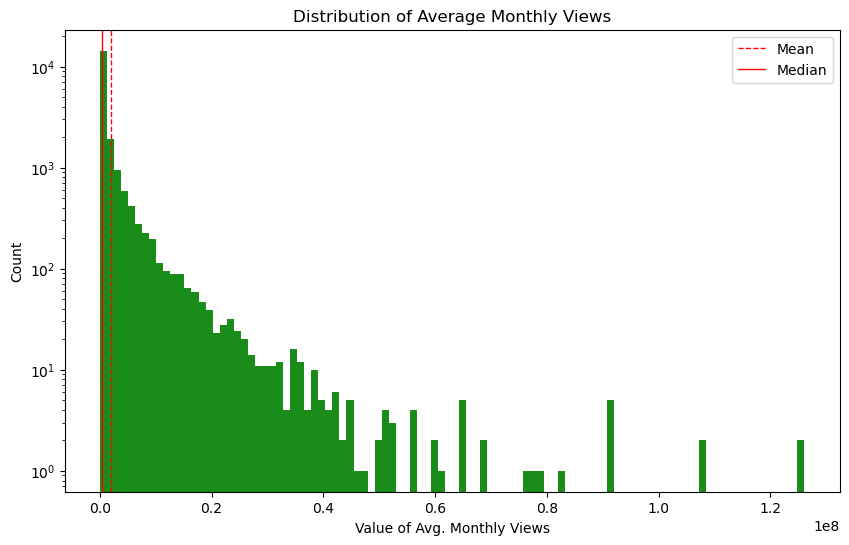

In [5]:
# Plot the distribution of Average Monthly Views
plt.figure(figsize=(10, 6))
plt.hist(df['avg_views_per_month'], bins=100, color='g', alpha=0.9)
plt.axvline(df['avg_views_per_month'].mean(), color='r', linestyle='--', label='Mean', linewidth=1)
plt.axvline(df['avg_views_per_month'].median(), color='r', linestyle='-', label='Median', linewidth=1)
plt.title('Distribution of Average Monthly Views')
plt.xlabel('Value of Avg. Monthly Views')
plt.ylabel('Count')
plt.yscale('log') # log the data to combat the right skew of the histogram
plt.legend()
plt.show()

I recognize that an artist may not have access to the data point `months_published` prior to releasing their song, which makes the time component of this problem a little tricky. I had thought that I could use the average number of monthly views they might expect as a target variable, yet some songs might surge in popularity at release then dwindle in views after the fact. I think it's fair to use the average monthly views to normalize the data and account for how long a song has been out. I'd like to test this target variable against the total number of views and see how it impacts model performance. 

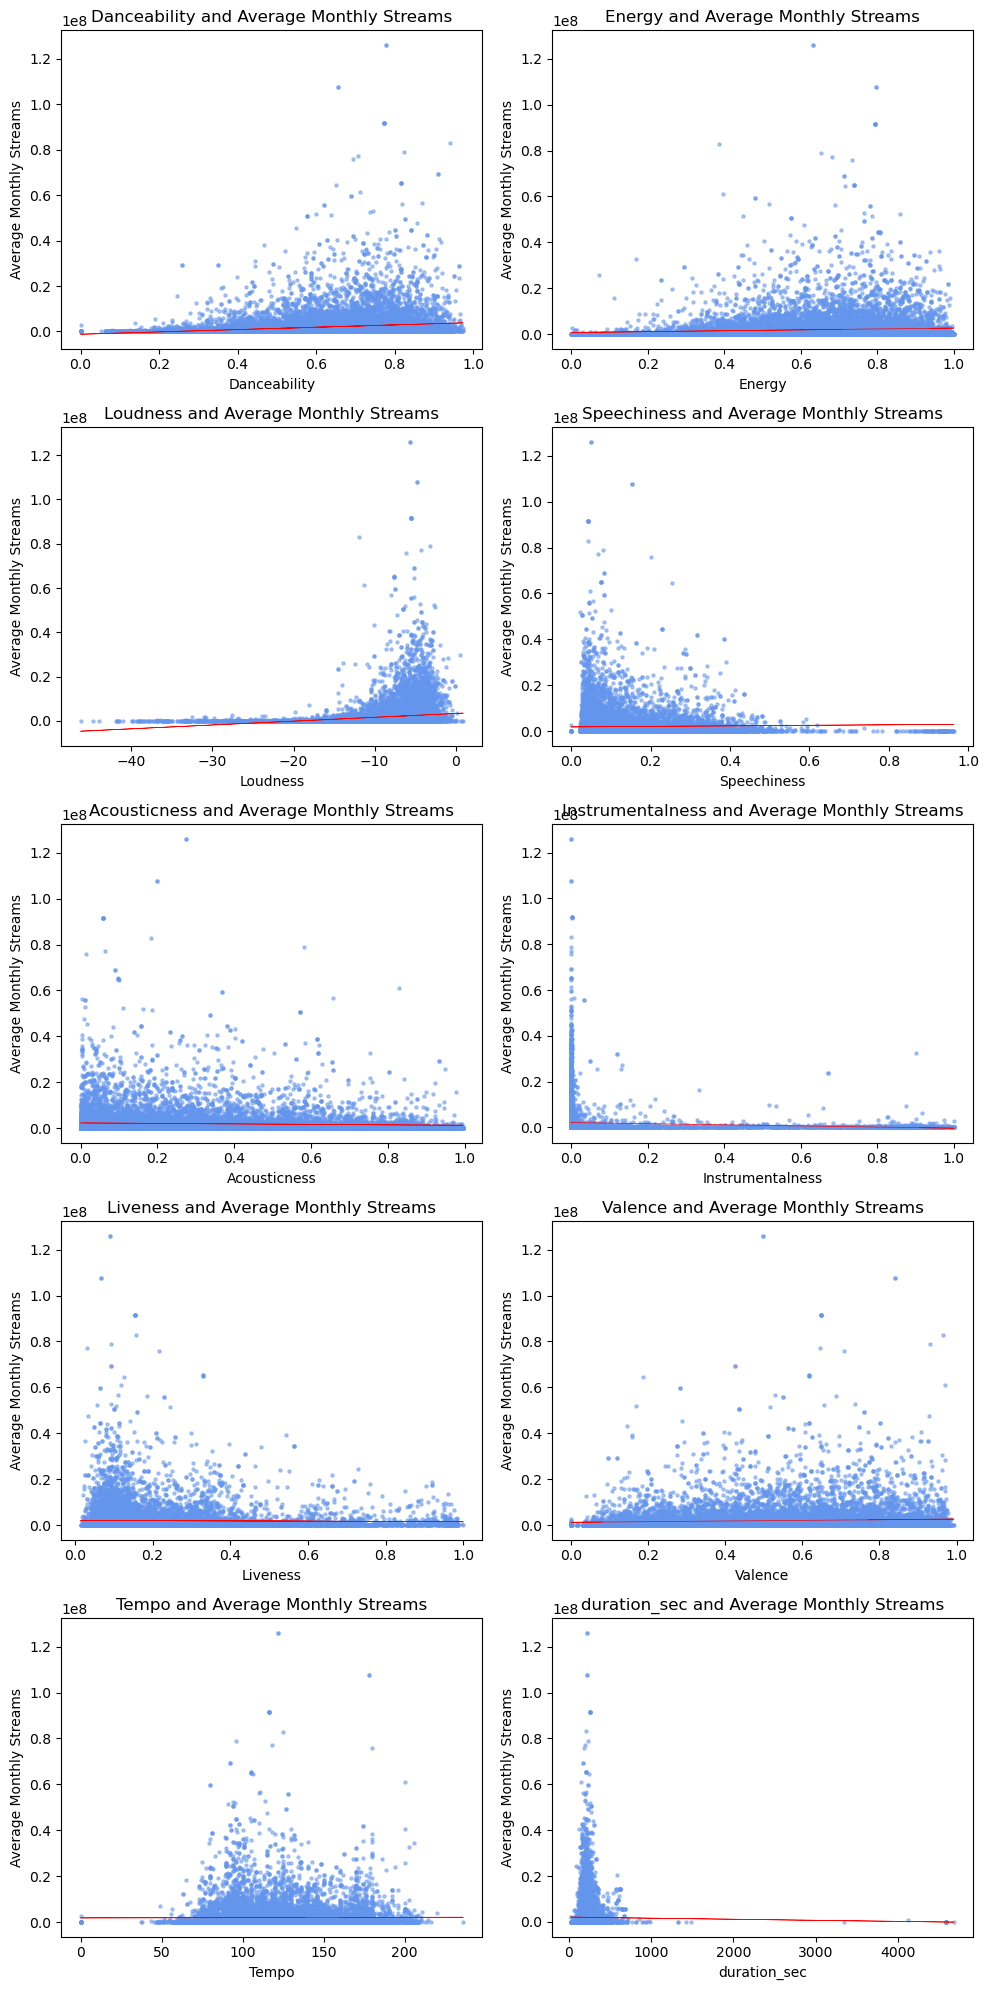

In [25]:
plt.subplots(5, 2, figsize=(10, 20))

for i, col in enumerate(df.columns[:10]):
    plt.subplot(5, 2, i+1)
    x = df[col]
    y = df['avg_views_per_month']
    plt.scatter(x, y, color='cornflowerblue', alpha=0.5, s=5)
    
    # Calculate & plot line of best fit
    m, b = np.polyfit(x, y, 1) # m = slope, b = intercept
    plt.plot(x, m*x + b, color='r', linewidth=0.5)
    
    plt.title(f'{col} and Average Monthly Streams')
    plt.xlabel(col)
    plt.ylabel('Average Monthly Streams')
    
plt.tight_layout()
plt.show()

Same as views, there does not appear to be a linear relationship between the features & the target variable `avg_view_per_month` meaning that linear models would be unsuitable for such a problem. My plan is to use this y feature to train some shallow learning models before testing a nueral network.

---

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Model selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB